<a href="https://colab.research.google.com/github/orsli/Data-Science-Fundamentals/blob/main/Urs%20Habegger_solved_CodingTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern

# Coding Task 2

- Deadline (upload to Ilias): 2023-05-14 24:00
- Solutions in lecture on 2023-05-17
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points]
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points]
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun !

In [97]:
# libraries and drive mount

from google.colab import drive
drive.mount('/content/drive')

from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from skimage import io, color, filters, morphology, measure
import pyheif

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
# converting to png and saving

url_pre  = '/content/drive/MyDrive/Data-CCD/images/'
files  = os.listdir(url_pre)
images = []

for url_name in files:
  if url_name.split('.')[-1] == 'HEIC':
   heif_file = pyheif.read(url_pre+url_name)
   image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data,"raw",)
   url_name = url_name.split('.')[0]+'.png'
   image.save(url_pre+url_name, format="png")
   images.append(url_pre+url_name)

display(images)

['/content/drive/MyDrive/Data-CCD/images/IMG_5387.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5382.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5391.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5386.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5385.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5384.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5390.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5381.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5392.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5389.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5380.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5388.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5383.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5379.png',
 '/content/drive/MyDrive/Data-CCD/images/IMG_5393.png']

filtering and threshold:
(2016, 3024)
file: IMG_5387.png


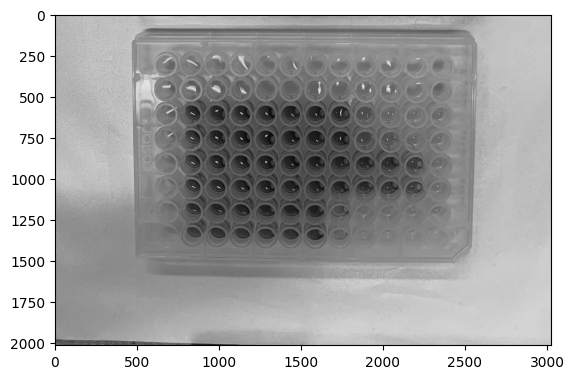


black/white bins:


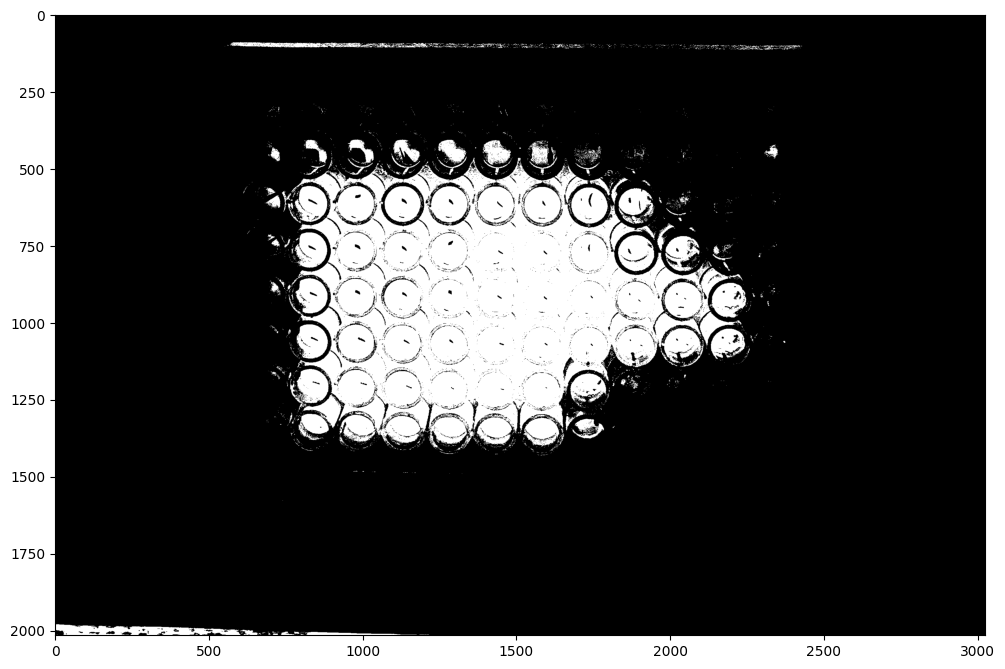

In [94]:
# filtering and threshold

imageRGB = io.imread(images[0])
image = imageRGB[:,:,2]
image = image[image.shape[0]//2:image.shape[0],:]

print('filtering and threshold:')
print(image.shape)
print('file:', images[0][39:])

plt.imshow(image, cmap ='gray')
plt.show()

# thresholding for black/white bins

image_threshold = image < 100

print()
print('black/white bins:')
plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
plt.show()

matplotlib.image.imsave('image-bw.png', image_threshold)

My code counts 51 bins out of 51 in IMG_5387.png.


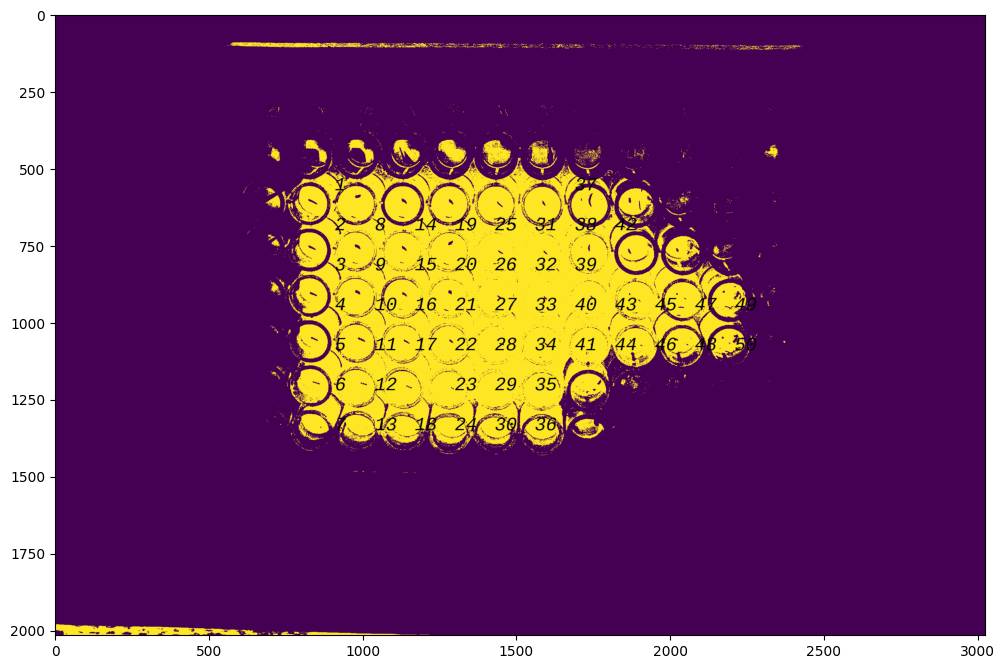

In [96]:
# counting bins in 1 picture with sliding

from PIL import Image, ImageDraw, ImageFont

stepsize  = 130
threshold = 200

image = Image.open('image-bw.png')
pixels = image.load()
size = image.size
draw = ImageDraw.Draw(image)
font = ImageFont.truetype('LiberationMono-Italic.ttf', 60)
i = 1
for x in range(0, size[0], stepsize):
    for y in range(0, size[1], stepsize):
        if pixels[x, y][1] > threshold:
            draw.text((x, y), str(i), (0, 0, 0), font=font)
            i += 1
image.save('result.png')
plt.figure(figsize=(12,12))
plt.imshow(image)
print('My code counts',i,'bins out of 51 in', images[0][39:] + '.')

In [103]:
# algorithm with window sliding to count bins in all pictures
from PIL import Image, ImageDraw, ImageFont

stepsize  = 130
threshold = 200

# bins counted by eye from the png files
ground_truth = {'IMG_5379':54,'IMG_5380':48,'IMG_5381':62,'IMG_5382':46,\
                'IMG_5383':44,'IMG_5384':32,'IMG_5385':54,\
                'IMG_5386':52,'IMG_5387':51,'IMG_5388':71,'IMG_5389':56,\
                'IMG_5390':59,'IMG_5391':40,'IMG_5392':64,\
                'IMG_5393':62}

url_pre  = '/content/drive/MyDrive/Data-CCD/images/'
files  = os.listdir(url_pre)
image_files = []
for url_name in files:
  if url_name.split('.')[-1] == 'png': image_files.append(url_name)
image_files.sort()

for file in image_files:
  image = Image.open(url_pre+file)
  pixels = image.load()
  size = image.size
  draw = ImageDraw.Draw(image)
  font = ImageFont.truetype('LiberationMono-Italic.ttf', 60)
  i = 1
  for x in range(0, size[0], stepsize):
    for y in range(0, size[1], stepsize):
        if pixels[x, y][1] > threshold:
            draw.text((x, y), str(i), (255, 0, 0), font=font)
            i += 1
  image.save(file+'res.png')
  gt = ground_truth[file.split('.')[0]]
  print('For',file,'the algorithm counts',i,'bins out of',gt,'counted by eye.')

For IMG_5379.png the algorithm counts 35 bins out of 54 counted by eye.
For IMG_5380.png the algorithm counts 70 bins out of 48 counted by eye.
For IMG_5381.png the algorithm counts 46 bins out of 62 counted by eye.
For IMG_5382.png the algorithm counts 50 bins out of 46 counted by eye.
For IMG_5383.png the algorithm counts 54 bins out of 44 counted by eye.
For IMG_5384.png the algorithm counts 25 bins out of 32 counted by eye.
For IMG_5385.png the algorithm counts 51 bins out of 54 counted by eye.
For IMG_5386.png the algorithm counts 43 bins out of 52 counted by eye.
For IMG_5387.png the algorithm counts 50 bins out of 51 counted by eye.
For IMG_5388.png the algorithm counts 60 bins out of 71 counted by eye.
For IMG_5389.png the algorithm counts 50 bins out of 56 counted by eye.
For IMG_5390.png the algorithm counts 81 bins out of 59 counted by eye.
For IMG_5391.png the algorithm counts 80 bins out of 40 counted by eye.
For IMG_5392.png the algorithm counts 96 bins out of 64 counted 

In [106]:
# algorithm with image segmentation to count bins in all pictures

import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology, measure

image_dir = '/content/drive/MyDrive/Data-CCD/images/'

# bins counted by eye from the png files
ground_truth = {'IMG_5379':54,'IMG_5380':48,'IMG_5381':62,'IMG_5382':46,\
                'IMG_5383':44,'IMG_5384':32,'IMG_5385':54,\
                'IMG_5386':52,'IMG_5387':51,'IMG_5388':71,'IMG_5389':56,\
                'IMG_5390':59,'IMG_5391':40,'IMG_5392':64,\
                'IMG_5393':62}

for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        # Read the image
        image_path = os.path.join(image_dir, filename)
        image = io.imread(image_path)

        gray_image = color.rgb2gray(image)
        blurred_image = filters.gaussian(gray_image, sigma=1)
        threshold_value = 0.010125  # Adjust threshold as needed
        mask = blurred_image < threshold_value

        closed_mask = morphology.binary_closing(mask, morphology.disk(3))
        labeled_mask = measure.label(closed_mask)

        num_wells = np.max(labeled_mask)
        gt = ground_truth[filename.split('.')[0]]
        print('For',filename,'the algorithm counts', num_wells,'bins out of', gt,'counted by eye.')

For IMG_5387.png the algorithm counts 51 bins out of 51 counted by eye.
For IMG_5382.png the algorithm counts 112 bins out of 46 counted by eye.
For IMG_5391.png the algorithm counts 0 bins out of 40 counted by eye.
For IMG_5386.png the algorithm counts 68 bins out of 52 counted by eye.
For IMG_5385.png the algorithm counts 14 bins out of 54 counted by eye.
For IMG_5384.png the algorithm counts 88 bins out of 32 counted by eye.
For IMG_5390.png the algorithm counts 0 bins out of 59 counted by eye.
For IMG_5381.png the algorithm counts 38 bins out of 62 counted by eye.
For IMG_5392.png the algorithm counts 0 bins out of 64 counted by eye.
For IMG_5389.png the algorithm counts 14 bins out of 56 counted by eye.
For IMG_5380.png the algorithm counts 2 bins out of 48 counted by eye.
For IMG_5388.png the algorithm counts 1 bins out of 71 counted by eye.
For IMG_5383.png the algorithm counts 45 bins out of 44 counted by eye.
For IMG_5379.png the algorithm counts 44 bins out of 54 counted by e